In [1]:
from annotations_processor import *

In [2]:
mturk_data_annotations_path = '../data_annotations/mturk_results_imagenet.csv'
mturk_labels = load_human_labels(mturk_data_annotations_path)

In [3]:
mturk_labels.head()

,WorkerId,Input.wordnet_id,Input.class_index,Input.feature_index,Input.feature_rank,Answer.main,Answer.confidence,Answer.reasons
0,52,n01440764,0,59,1,0,4.0,focus is on body of tench
1,22,n01440764,0,59,1,0,4.0,focus is on part of the tench
2,229,n01440764,0,59,1,0,5.0,The focus of the red region in the Highlighted...
3,186,n01440764,0,59,1,0,5.0,focus is on main body part of Tinca tinca.
4,234,n01440764,0,59,1,0,4.0,The main obect is tench whose some part got fo...


In [4]:
mturk_labels.columns

Index(['WorkerId', 'Input.wordnet_id', 'Input.class_index',
       'Input.feature_index', 'Input.feature_rank', 'Answer.main',
       'Answer.confidence', 'Answer.reasons'],
      dtype='object')

In [5]:
aggregated_labels = aggregate_class_wise(mturk_labels)
aggregated_labels

,Input.wordnet_id,Input.class_index,Input.feature_index,Input.feature_rank,Answer.main
0,n01440764,0,59,1,0
1,n01440764,0,686,2,0
2,n01440764,0,701,3,0
3,n01440764,0,1696,5,0
4,n01440764,0,2030,4,0
...,...,...,...,...,...
4995,n15075141,999,1154,2,0
4996,n15075141,999,1290,4,0
4997,n15075141,999,1412,3,0
4998,n15075141,999,1777,1,0


In [6]:

aggregated_data_path = '../data_annotations/aggregated_imagenet_mturk.csv'
store_aggregated_labels(aggregated_data_path, aggregated_labels)    

# Visualize human labels per class and feature

In [7]:
import matplotlib.pyplot as plt

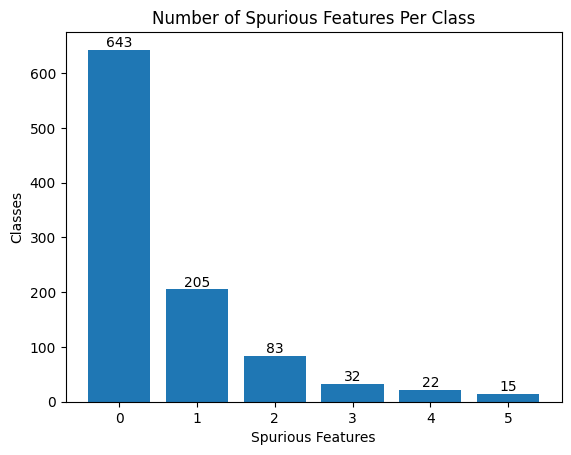

In [8]:
plt.figure()
#class and number of spurious features
class_spurious = aggregated_labels.groupby('Input.class_index')['Answer.main'].sum().reset_index()
heights = class_spurious.groupby('Answer.main').size()
plt.bar(x = range(6), height=heights)
for i, height in enumerate(heights):
    plt.text(i, height, str(height), ha='center', va='bottom')
plt.xlabel('Spurious Features')
plt.ylabel('Classes')
plt.title('Number of Spurious Features Per Class')
plt.show()


In [9]:
print(sum(heights[1:]))  #equal to 357 so data is bene

357


In [11]:
spurious_classes_path = '../data_annotations/spurious_imagenet_classes.csv'
spurious_classes = filter_spurious_classes(aggregated_labels) 
spurious_classes.head()

In [ ]:
store_aggregated_labels(spurious_classes_path, spurious_classes)    